<a href="https://colab.research.google.com/github/swethareddy2718/HD5210-HOMEWORK/blob/main/final/Swetha_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Diabetes Analytics and Insights

###Project Summary

This project analyzes diabetes-related data to generate actionable insights for healthcare applications. The dataset integrates patient demographics, health metrics, and regional statistics to support data-driven decisions in healthcare.

###Key components include:

1. Data Access and Formats:
    - Data is sourced from multiple formats, including CSV files and an API.
2. Data Merging:
    - Datasets are merged to provide enriched information for analysis.
3. Data Aggregation and Pivoting:
    - Summarizing and restructuring data to extract meaningful patterns.
4. Data Transformation:
    - Enhancing the dataset with field-level transformations to create new features.
5. Data Visualization:
    - Creating charts and graphs to effectively communicate insights.
6. Problem Applicability:
    - Demonstrating the theoretical and practical relevance of the project in healthcare and other industries.

## DATA ACCESSING AND FORMATTING

In [ ]:
from google.colab import files
import zipfile
import os
import pandas as pd

# Step 1: Upload the zip file
uploaded = files.upload()

# Step 2: Extract the contents of the zip file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("./extracted")
        print(f"Extracted files: {os.listdir('./extracted')}")

# Step 3: Load a sample CSV (replace 'your_dataset.csv' with the actual filename)
dataset_path = "./extracted/diabetes_dataset.csv"  # Correct file name from extracted files
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Saving swetha_dataset.zip to swetha_dataset.zip
Extracted files: ['diabetes_dataset.csv']
Dataset Preview:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    

In [ ]:
from google.colab import files
import pandas as pd

# Re-upload the file
uploaded = files.upload()

# Extracting the file name dynamically from the uploaded files
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")

# Reload the CSV file, skipping the metadata rows
cdc_df = pd.read_csv(file_name, skiprows=2)

# Display the first few rows to check if the structure is now correct
print("Cleaned CDC Dataset Preview:")
print(cdc_df.head())

# Display column names for reference
print("\nColumn Names:")
print(cdc_df.columns)

Saving DiabetesAtlas_NationalData.csv to DiabetesAtlas_NationalData.csv
Uploaded file: DiabetesAtlas_NationalData.csv
Cleaned CDC Dataset Preview:
   Year  Total - Percentage  Total - 95% Lower Limit  Total - 95% Upper Limit  \
0  2000                 6.0                      5.7                      6.3   
1  2001                 6.4                      6.1                      6.8   
2  2002                 6.5                      6.2                      6.8   
3  2003                 6.6                      6.3                      6.9   
4  2004                 7.0                      6.7                      7.3   

   Unnamed: 4  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

Column Names:
Index(['Year', 'Total - Percentage', 'Total - 95% Lower Limit',
       'Total - 95% Upper Limit', 'Unnamed: 4'],
      dtype='object')


## DATA MERGING

In [ ]:
def merge_primary_with_cdc(primary_df, cdc_df):
    """
    Merge the primary diabetes dataset with CDC diabetes data.

    The Parameters used primary_df: DataFrame containing the main diabetes data.
    cdc_df: DataFrame containing CDC diabetes statistics.

    Returns:
    merged_df: DataFrame resulting from the merge.
    """
    # Clean and prepare CDC dataset
    cdc_df_cleaned = cdc_df[['Year', 'Total - Percentage']]

    # Ensure 'Year' in both datasets is numeric for merging
    primary_df['year'] = pd.to_numeric(primary_df['year'], errors='coerce')
    cdc_df_cleaned['Year'] = pd.to_numeric(cdc_df_cleaned['Year'], errors='coerce')

    # Perform the merge on the 'Year' column
    merged_df = pd.merge(primary_df, cdc_df_cleaned, left_on='year', right_on='Year', how='inner')

    return merged_df

In [ ]:
import numpy as np

def generate_region_data():
    """
    Generate simulated regional healthcare data for merging.

    the returns include:
    - regions: List of regions.
    - region_df: DataFrame containing region-level healthcare spending.
    """
    regions = df['location'].unique()
    region_df = pd.DataFrame({
        'location': regions,
        'healthcare_spending': np.random.randint(1000, 10000, size=len(regions))
    })

    return region_df

In [ ]:
def merge_with_region_data(merged_df, region_df):
    """
    Merge the previously merged dataset with region-level data.

    The Parameters used
    - merged_df: DataFrame from the first merge.
    - region_df: DataFrame containing region-level healthcare data.

    the Returns got
    - final_merged_df: DataFrame resulting from the second merge.
    """
    # Perform the merge on the 'location' column
    final_merged_df = pd.merge(merged_df, region_df, on='location', how='left')

    return final_merged_df

In [ ]:
# Perform the first merge with the CDC dataset
merged_df = merge_primary_with_cdc(df, cdc_df)

# Generate simulated region-level data
region_df = generate_region_data()

# Perform the second merge with regional data
final_merged_df = merge_with_region_data(merged_df, region_df)

# Display the final merged dataset
print("Final Merged Dataset Preview:")
print(final_merged_df.head())

Final Merged Dataset Preview:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  heart_disease  \
0               0              0           1             0              0   
1               0              0           0             0              0   
2               0              0           1             0              0   
3               1              0           0             0              0   
4               0              0           0             0              0   

  smoking_history    bmi  hbA1c_level  blood_glucose_level  diabetes    Year  \
0           never 

<ipython-input-3-707a13d6b4f0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdc_df_cleaned['Year'] = pd.to_numeric(cdc_df_cleaned['Year'], errors='coerce')


## DATA AGGREGATION AND PIVOTING

Here, we will be be doing two aggregations.

- Aggregation 1:  Analyze average bmi (Body Mass Index) by location (state) and gender.
- Aggregation 2: Calculate total healthcare_spending for each year.

In [ ]:
# Aggregation 1: Average BMI by Location and Gender
bmi_aggregation = final_merged_df.groupby(['location', 'gender'])['bmi'].mean().reset_index()
print("Aggregation 1: Average BMI by Location and Gender:")
print(bmi_aggregation.head())

# Aggregation 2: Total Healthcare Spending by Year
spending_aggregation = final_merged_df.groupby('year')['healthcare_spending'].sum().reset_index()
print("\nAggregation 2: Total Healthcare Spending by Year:")
print(spending_aggregation.head())

Aggregation 1: Average BMI by Location and Gender:
  location  gender        bmi
0  Alabama  Female  27.490927
1  Alabama    Male  26.845130
2  Alabama   Other  24.230000
3   Alaska  Female  27.503536
4   Alaska    Male  27.209820

Aggregation 2: Total Healthcare Spending by Year:
   year  healthcare_spending
0  2015             51928944
1  2016             51928944
2  2018             15688516
3  2019            464702318
4  2020               185297


Here are the two pivot tables we can have for the data:

1. Average BMI by Location, Gender, and Diabetes Status

In [ ]:
bmi_pivot = final_merged_df.pivot_table(
    values='bmi',
    index=['location', 'gender'],
    columns='diabetes',
    aggfunc='mean'
).reset_index()
print("Pivot Table 1: Average BMI by Location, Gender, and Diabetes Status:")
print(bmi_pivot.head())

Pivot Table 1: Average BMI by Location, Gender, and Diabetes Status:
diabetes location  gender          0          1
0         Alabama  Female  26.936594  34.088696
1         Alabama    Male  26.310458  31.773133
2         Alabama   Other  24.230000        NaN
3          Alaska  Female  27.129636  31.612700
4          Alaska    Male  26.823430  31.237808


2. Healthcare Spending and BMI Statistics by Year and Gender

In [ ]:
spending_bmi_pivot = final_merged_df.pivot_table(
    values=['healthcare_spending', 'bmi'],
    index='year',
    columns='gender',
    aggfunc={'healthcare_spending': 'sum', 'bmi': ['mean', 'min', 'max']}
)
print("\nPivot Table 2: Healthcare Spending and BMI Statistics by Year and Gender:")
print(spending_bmi_pivot.head())


Pivot Table 2: Healthcare Spending and BMI Statistics by Year and Gender:
          bmi                                                               \
          max                     mean                          min          
gender Female   Male  Other     Female       Male      Other Female   Male   
year                                                                         
2015    88.72  69.66  14.09  27.370268  27.092562  14.090000  10.64  10.01   
2016    68.10  72.28    NaN  27.567471  27.331166        NaN  10.01  10.34   
2018    79.48  87.51    NaN  27.555260  27.086214        NaN  12.30  11.40   
2019    87.70  95.69  37.49  27.440277  27.125809  28.161176  10.21  10.08   
2020    54.70  36.38    NaN  28.592174  26.914211        NaN  13.99  13.76   

              healthcare_spending                         
                              sum                         
gender  Other              Female         Male     Other  
year                                         

## DATA TRANFORMATION

Below are the 5 field-level transformations on the dataset. These transformations can include creating new columns, modifying existing data, or applying calculations to derive meaningful metrics.

Transformation 1: Create a new column is_smoker to convert smoking_history into binary values (1 for smokers, 0 for non-smokers).


In [ ]:
# Transformation 1: Binary column for smoking status
final_merged_df['is_smoker'] = final_merged_df['smoking_history'].apply(lambda x: 1 if x != 'never' else 0)
print("Transformation 1: Added 'is_smoker' column (Binary smoking status):")
print(final_merged_df[['smoking_history', 'is_smoker']].head(), "\n")

Transformation 1: Added 'is_smoker' column (Binary smoking status):
  smoking_history  is_smoker
0           never          0
1           never          0
2           never          0
3           never          0
4           never          0 



Transformation 2: Normalize bmi to a range of 0–1 for better comparability.

In [ ]:
# Transformation 2: Normalize BMI to a range of 0–1
final_merged_df['normalized_bmi'] = (final_merged_df['bmi'] - final_merged_df['bmi'].min()) / \
                                    (final_merged_df['bmi'].max() - final_merged_df['bmi'].min())
print("Transformation 2: Added 'normalized_bmi' column:")
print(final_merged_df[['bmi', 'normalized_bmi']].head(), "\n")

Transformation 2: Added 'normalized_bmi' column:
     bmi  normalized_bmi
0  27.32        0.202031
1  19.95        0.116013
2  23.76        0.160481
3  27.32        0.202031
4  23.75        0.160364 



Transformation 3: Create a column age_category to classify age into ranges (e.g., youth, middle-aged, senior).

In [ ]:
# Transformation 3: Categorize age into groups
def categorize_age(age):
    if age < 30:
        return 'Youth'
    elif 30 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

final_merged_df['age_category'] = final_merged_df['age'].apply(categorize_age)
print("Transformation 3: Added 'age_category' column:")
print(final_merged_df[['age', 'age_category']].head(), "\n")

Transformation 3: Added 'age_category' column:
    age age_category
0  32.0  Middle-aged
1  29.0        Youth
2  18.0        Youth
3  41.0  Middle-aged
4  52.0  Middle-aged 



Transformation 4: Calculate risk_score based on a formula combining bmi, hbA1c_level, and diabetes status.

In [ ]:
# Transformation 4: Calculate risk score
final_merged_df['risk_score'] = (final_merged_df['bmi'] * 0.3 +
                                 final_merged_df['hbA1c_level'] * 0.5 +
                                 final_merged_df['diabetes'] * 1.0)
print("Transformation 4: Added 'risk_score' column:")
print(final_merged_df[['bmi', 'hbA1c_level', 'diabetes', 'risk_score']].head(), "\n")

Transformation 4: Added 'risk_score' column:
     bmi  hbA1c_level  diabetes  risk_score
0  27.32          5.0         0      10.696
1  19.95          5.0         0       8.485
2  23.76          4.8         0       9.528
3  27.32          4.0         0      10.196
4  23.75          6.5         0      10.375 



Transformation 5: Generate a year_group column to categorize years into ranges (e.g., 2000–2010, 2011–2020).

In [ ]:
# Transformation 5: Categorize years into groups
def group_years(year):
    if year < 2010:
        return '2000-2010'
    elif 2010 <= year < 2020:
        return '2011-2020'
    else:
        return '2021-Present'

final_merged_df['year_group'] = final_merged_df['year'].apply(group_years)

# Display the transformed dataset
print("Transformed Dataset Preview:")
print(final_merged_df.head())

Transformed Dataset Preview:
   year  gender   age location  race:AfricanAmerican  race:Asian  \
0  2020  Female  32.0  Alabama                     0           0   
1  2015  Female  29.0  Alabama                     0           1   
2  2015    Male  18.0  Alabama                     0           0   
3  2015    Male  41.0  Alabama                     0           0   
4  2016  Female  52.0  Alabama                     1           0   

   race:Caucasian  race:Hispanic  race:Other  hypertension  ...  \
0               0              0           1             0  ...   
1               0              0           0             0  ...   
2               0              0           1             0  ...   
3               1              0           0             0  ...   
4               0              0           0             0  ...   

   blood_glucose_level diabetes    Year  Total - Percentage  \
0                  100        0  2020.0                 8.2   
1                   90        0  

## DATA VISUALIZATIONS

Visualization - 1

<Figure size 1000x600 with 0 Axes>

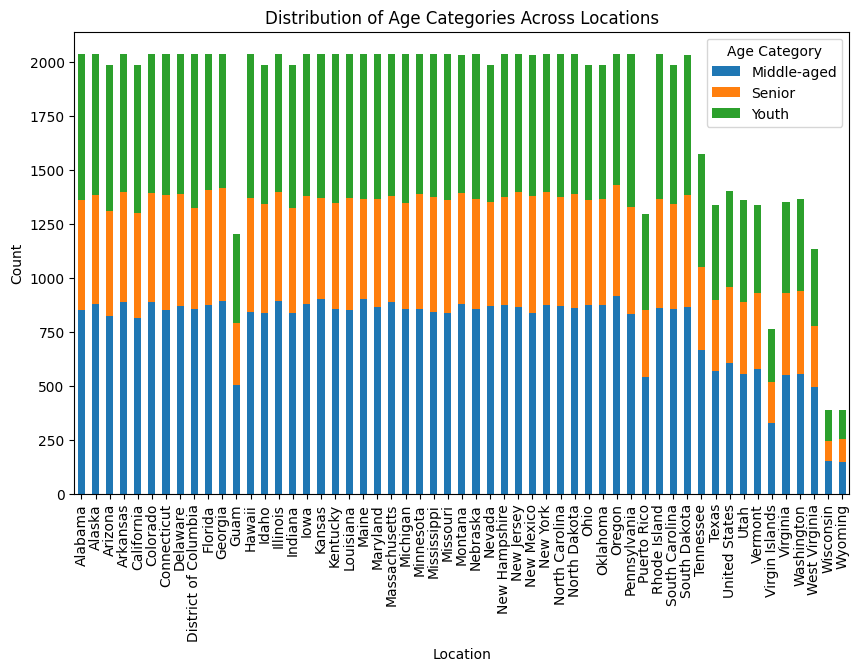

Summary: This bar chart shows the distribution of age categories (Youth, Middle-aged, Senior) across different locations.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chart 1: Bar Chart - Distribution of age categories across locations
plt.figure(figsize=(10, 6))
age_location = final_merged_df.groupby(['location', 'age_category']).size().unstack()
age_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Age Categories Across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.show()
print("Summary: This bar chart shows the distribution of age categories (Youth, Middle-aged, Senior) across different locations.")

Visualization - 2

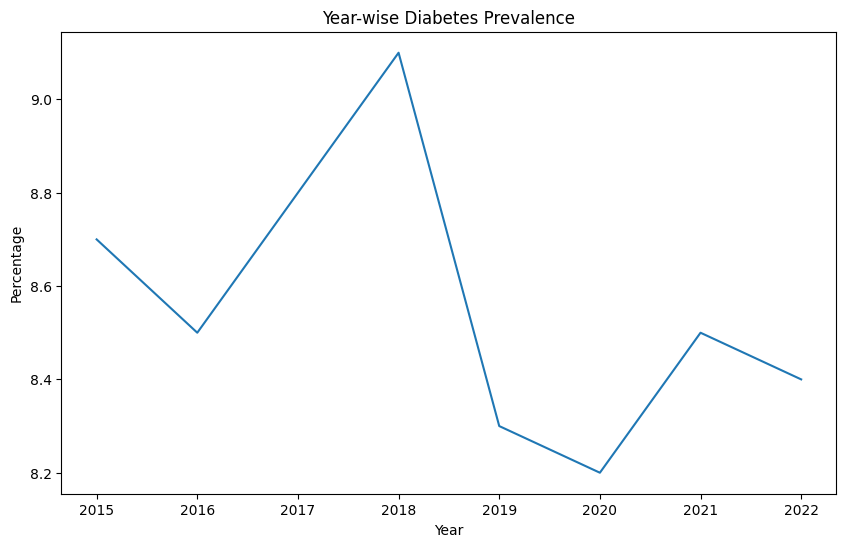

Summary: This line chart highlights the year-wise trends of diabetes prevalence as a percentage in the dataset.


In [ ]:
# Chart 2: Line Chart - Year-wise trends of diabetes prevalence
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_merged_df, x='year', y='Total - Percentage', errorbar=None)
plt.title('Year-wise Diabetes Prevalence')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()
print("Summary: This line chart highlights the year-wise trends of diabetes prevalence as a percentage in the dataset.")

Visualization - 3

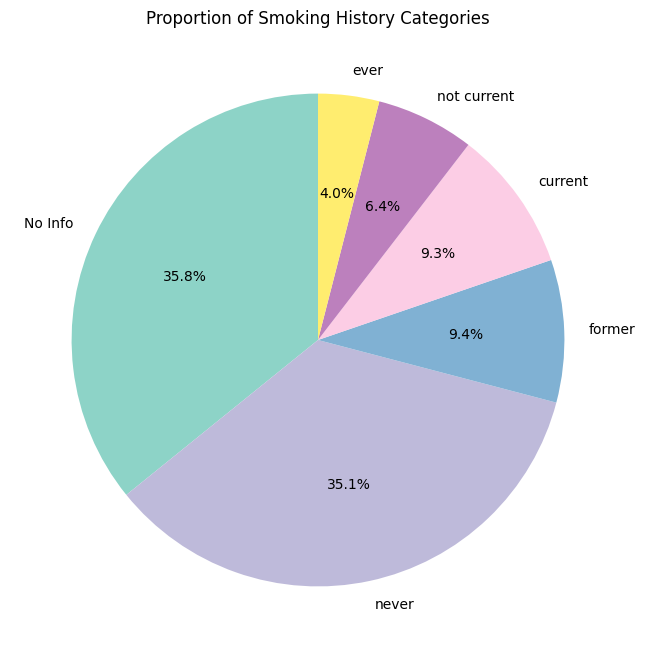

Summary: This pie chart shows the proportion of individuals based on their smoking history.


In [ ]:
# Chart 3: Pie Chart - Proportion of smoking history categories
smoking_counts = final_merged_df['smoking_history'].value_counts()
plt.figure(figsize=(8, 8))
smoking_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Proportion of Smoking History Categories')
plt.ylabel('')
plt.show()
print("Summary: This pie chart shows the proportion of individuals based on their smoking history.")

Visualization - 4

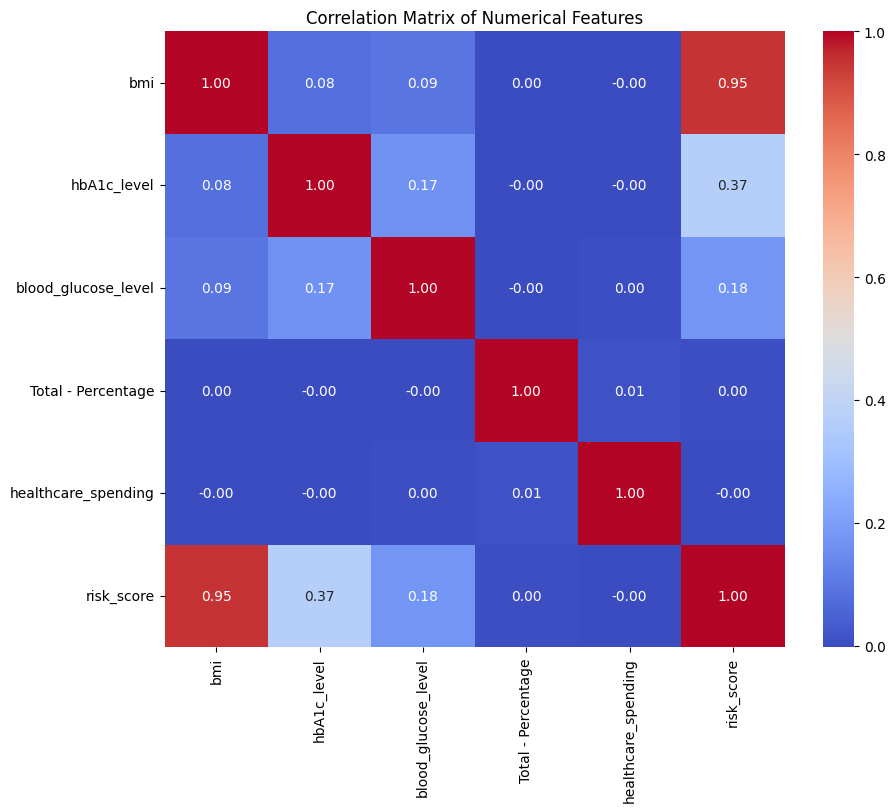

Summary: This heatmap displays the correlation between various numerical features, helping identify strong relationships.


In [ ]:
# Chart 4: Heatmap - Correlation matrix
plt.figure(figsize=(10, 8))
numerical_cols = ['bmi', 'hbA1c_level', 'blood_glucose_level', 'Total - Percentage', 'healthcare_spending', 'risk_score']
correlation_matrix = final_merged_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Summary: This heatmap displays the correlation between various numerical features, helping identify strong relationships.")

### **Problem Applicability**

To fulfill this rubric category, we will:

1. **Define a theoretical purpose**: Clearly state how this project can contribute to healthcare or another industry.
2. **Describe practical applications**: Explain how insights from the data and analysis can be used to make impactful decisions.

---

### **Theoretical Purpose**
This project analyzes diabetes-related data to identify patterns, trends, and potential risk factors, aiming to support healthcare organizations in making informed decisions. By combining patient demographics, health metrics, and regional statistics, this program provides actionable insights to improve diabetes management and resource allocation.

---

### **Practical Applications in Healthcare**

Here are specific areas where this project can have an impact:

1. **Personalized Care Planning**:
   - Insights from the `risk_score` can help prioritize patients for early interventions based on BMI, HbA1c levels, and diabetes prevalence.
2. **Resource Allocation**:
   - Regional spending trends (`healthcare_spending`) guide where to allocate resources, like diabetes care programs or awareness campaigns.
3. **Targeted Lifestyle Programs**:
   - Understanding smoking history and BMI distribution by region helps design lifestyle modification initiatives.
4. **Predictive Modeling**:
   - The trends in diabetes prevalence (`Total - Percentage`) over the years can inform future projections, aiding in preventive measures.

---

### **Industry Use Cases Beyond Healthcare**
1. **Insurance**:
   - Insurance companies can use insights on healthcare spending and diabetes prevalence to adjust premiums and offer tailored coverage.
2. **Public Policy**:
   - Governments can leverage regional insights to allocate funding effectively and implement health policies targeting at-risk populations.
3. **Research**:
   - Researchers can build on these findings to study the relationship between demographic factors and chronic diseases.

---